In [6]:
# C:\Users\Prathmesh\OneDrive\Desktop\Krish Naik\Machine Learning\Regression\Algerian_forest_fire\dataset\Algerian_forest_fires_cleaned_dataset.csv
# dataset\Algerian_forest_fires_cleaned_dataset.csv

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('C:/Users/Prathmesh/OneDrive/Desktop/Krish_Naik/Machine_Learning/Regression/Algerian_forest_fire/dataset/Algerian_forest_fires_cleaned_dataset.csv')


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [11]:
df.shape

(243, 15)

In [12]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
#fix spaces in column name
df.columns = df.columns.str.strip()

In [17]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [18]:
objects = [features for features in df.columns if df[features].dtype == 'O']

In [19]:
for i in objects:
  if i!= 'Classes':
    df[i] = df[i].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 22.9+ KB


In [21]:
# #lets save cleaned dataset
# df.to_csv('cleaned_dataset.csv', index = False)

In [22]:
#EDA

In [23]:
df.drop(['day','month','year'],axis = 1,inplace = True)

In [24]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [25]:
# if df['Classes'] == 'not fire':
#   df['Classes'] = 0
# else:
#   df['Classes'] = 1

In [26]:
# df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})


df['Classes'] == 'not fire' returns a boolean Series (not a single True/False value).
df.loc[condition, column] = value applies the update only where the condition is True.
.map() is a clean method when mapping known categories to new values.



In [27]:
# df['Classes'] = np.where(df['Classes'] == 'not fire', 0, 1)

In [28]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

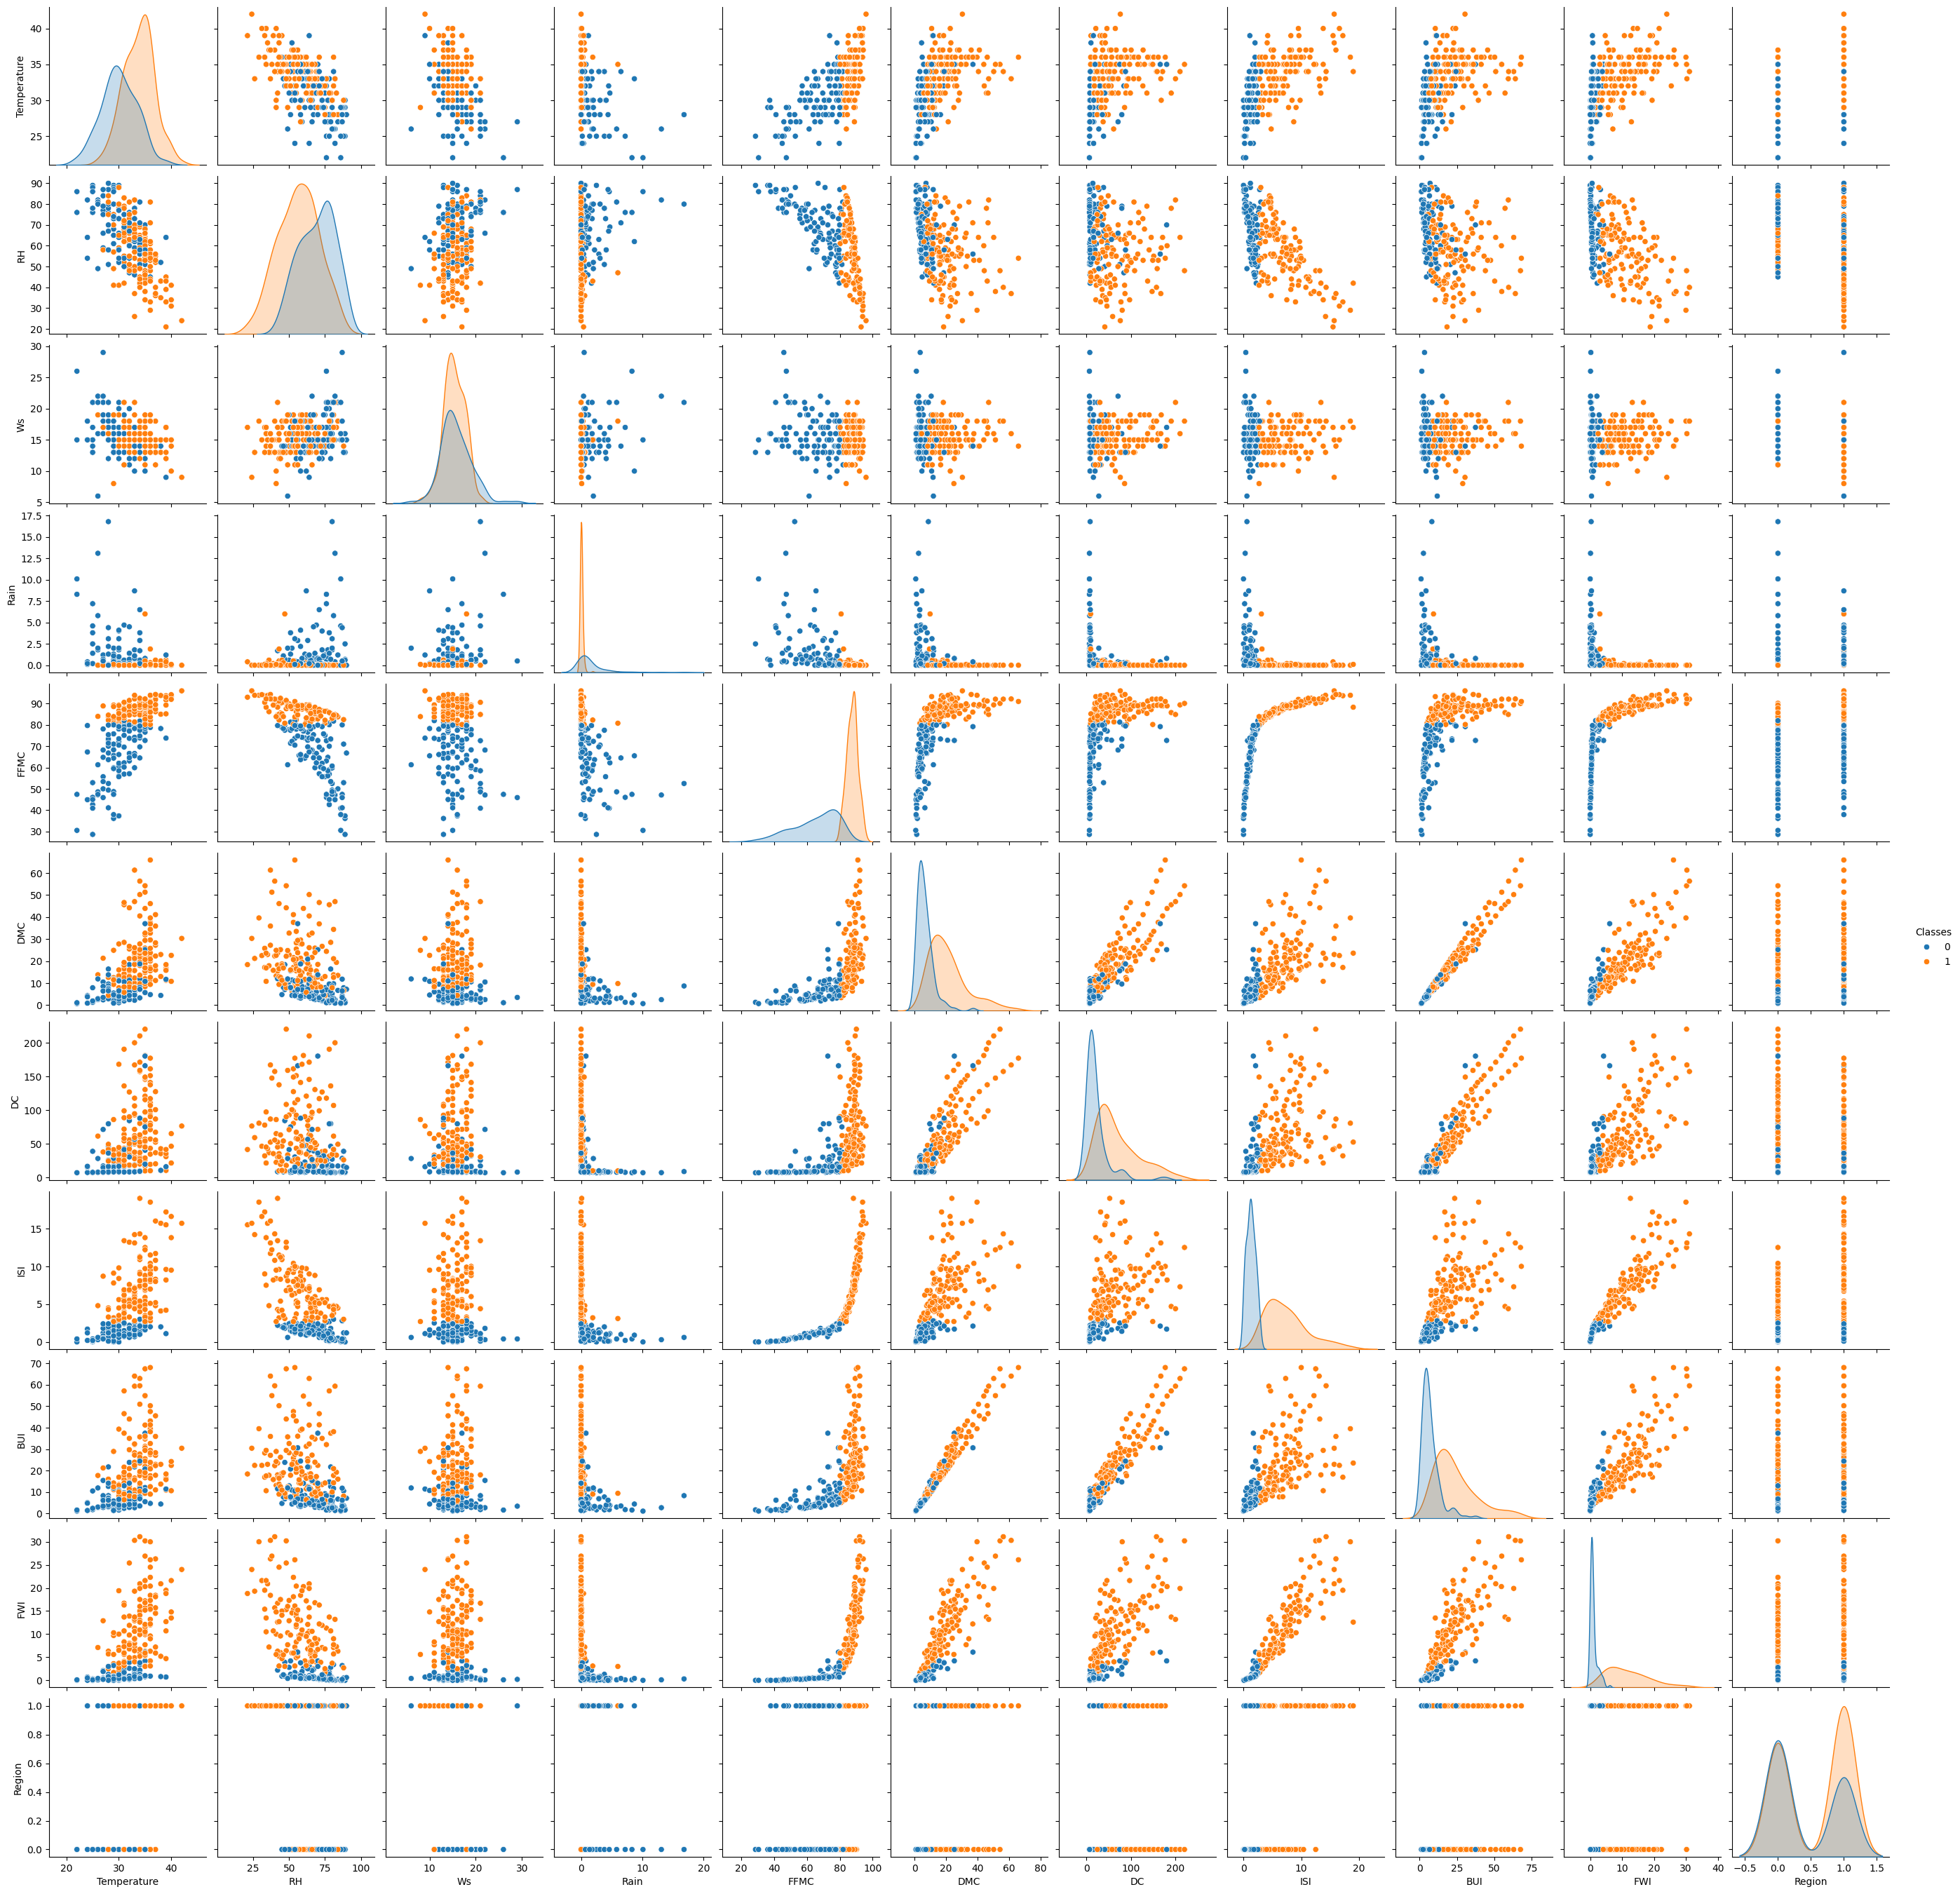

In [31]:
sns.pairplot(df,hue = 'Classes')

In [32]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

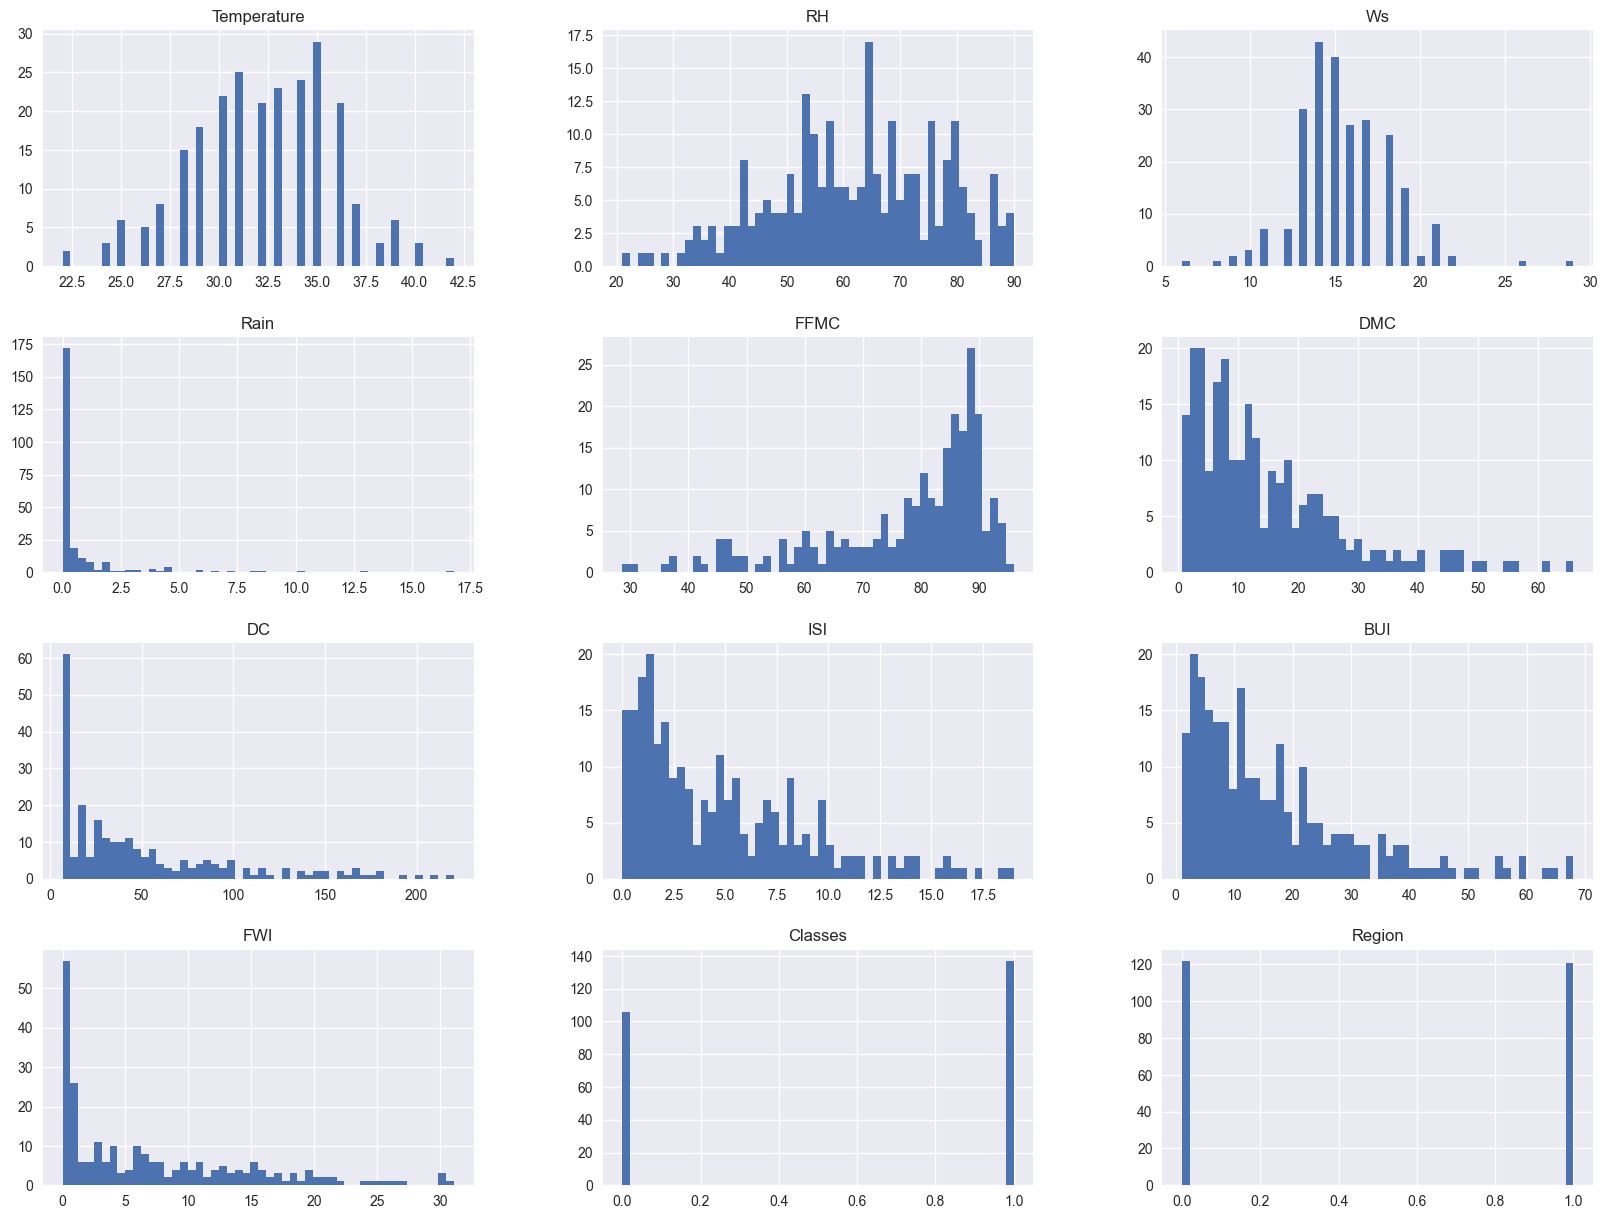

In [33]:
plt.style.use('seaborn-v0_8')  # Apply seaborn style
df.hist(bins=50, figsize=(20, 15))  # Plot histograms
plt.show()  # Show the plot

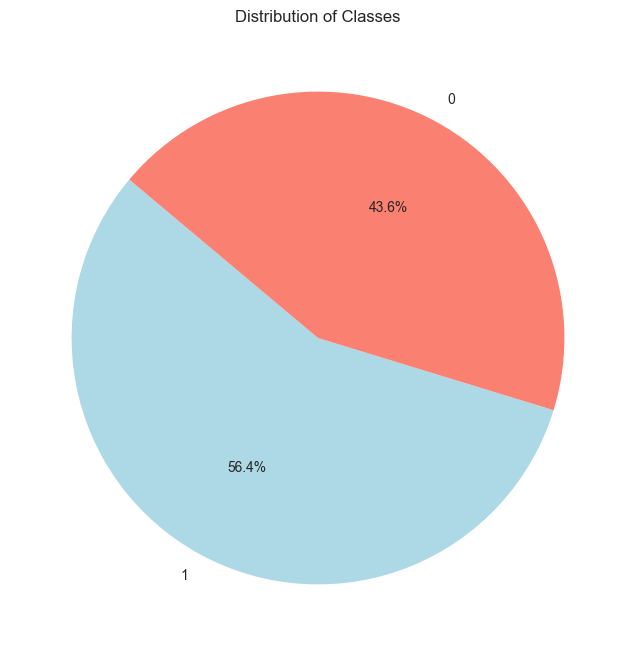

In [34]:
#Count occurrences of each class
class_counts = df['Classes'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title("Distribution of Classes")
plt.show()

In [35]:
corr = df.corr()

<Axes: >

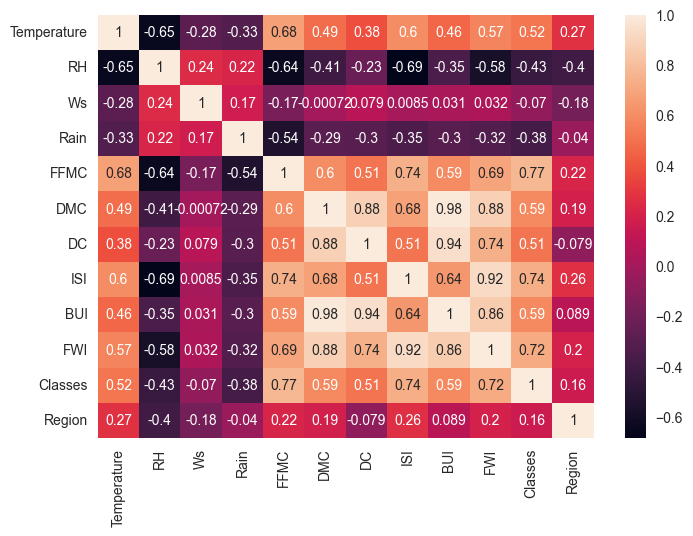

In [36]:
sns.heatmap(corr,annot = True)

In [37]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [38]:
# ## Monthly Fire Analysis
# dftemp=df.loc[df['Region']==0]
# plt.subplots(figsize=(13,6))
# sns.set_style('whitegrid')
# sns.countplot(x='month',hue='Classes',data=df)
# plt.ylabel('Number of Fires',weight='bold')
# plt.xlabel('Months',weight='bold')
# plt.title("Fire Analysis of Brjaia Regions",weight='bold')

In [39]:
#model training

In [40]:
#Step 1 independent and dependent features
x = df.drop('FWI',axis = 1)
y = df['FWI']

In [41]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [42]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [43]:
#Feature selection can be done before also

x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

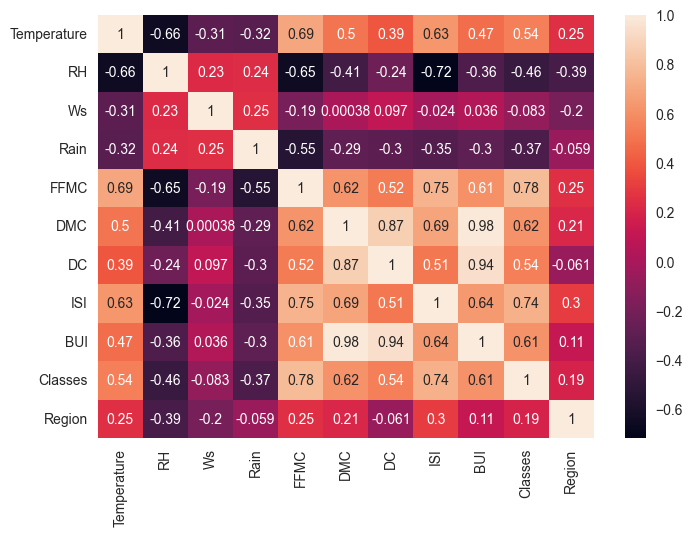

In [44]:
sns.heatmap(x_train.corr(),annot = True)

In [45]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(x_train,0.85)

In [47]:
x_train.drop(corr_features , axis = 1,inplace = True)
x_test.drop(corr_features , axis = 1,inplace = True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [48]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

Box Plots To understand Effect Of Standard Scaler


C:\Users\Prathmesh\AppData\Local\Temp\ipykernel_12180\2107400495.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

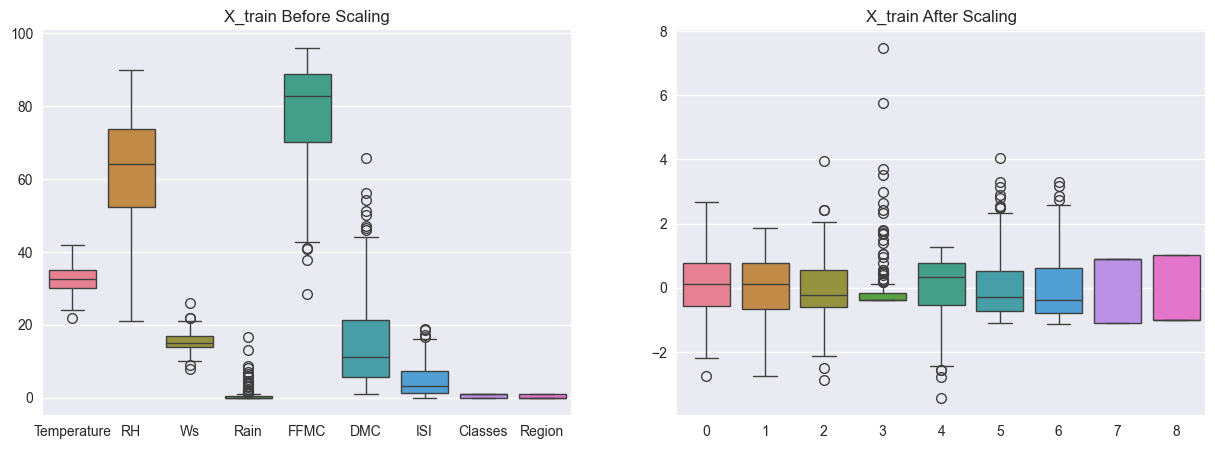

In [49]:
#Outliers
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_sc)
plt.title('X_train After Scaling')

In [50]:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
lr = LinearRegression()
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [52]:
print(mse , mae ,r2)

0.674276687379158 0.5468236465249978 0.9847657384266951


In [53]:
#if y-test and y_pred follows a linear relationship it is a verygood model

Text(0, 0.5, 'Predicted')

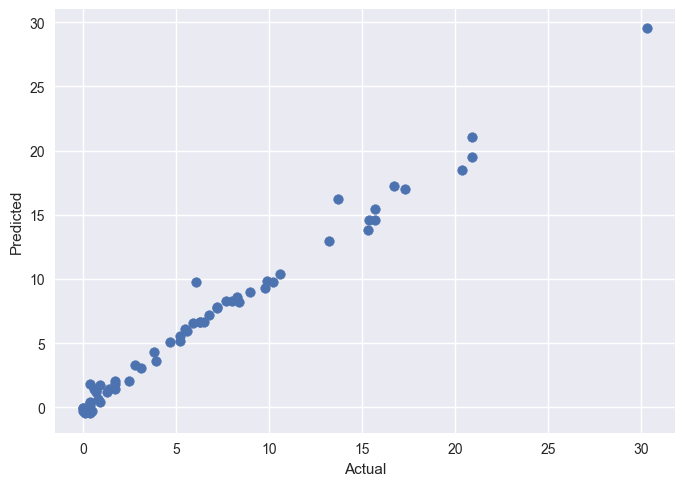

In [54]:
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

2.2483458918974772 1.133175994914409 0.9492020263112388


Text(0, 0.5, 'Predicted')

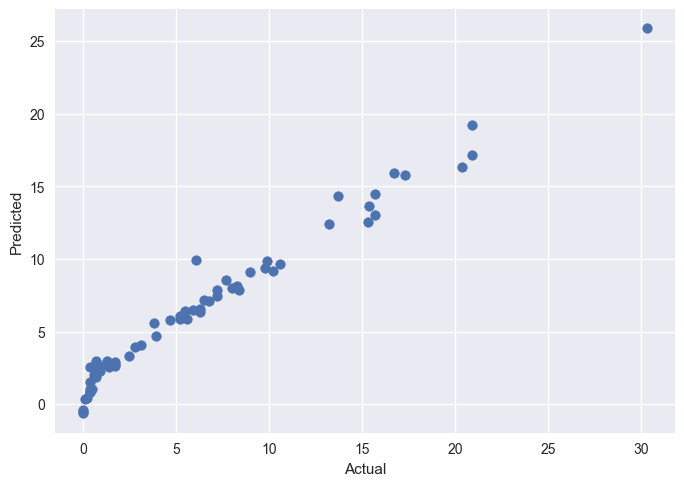

In [55]:
#Model Training
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr = Lasso()
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse , mae ,r2)
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

0.6949198918152096 0.5642305340105715 0.9842993364555512


Text(0, 0.5, 'Predicted')

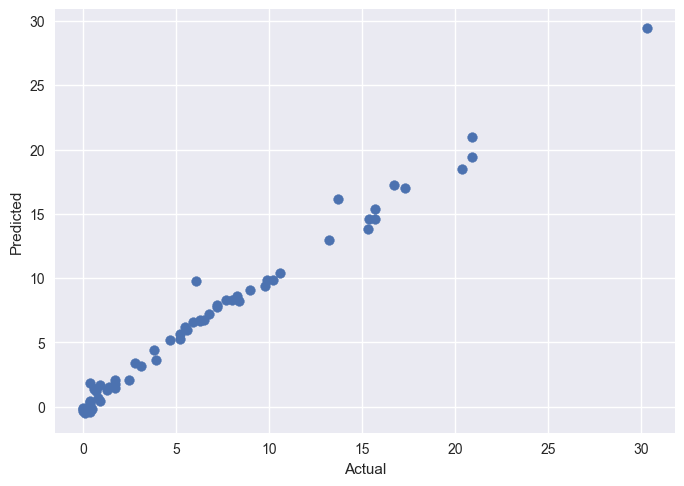

In [56]:
#Model Training
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r = Ridge()
r.fit(x_train_sc,y_train)
y_pred = r.predict(x_test_sc)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse , mae ,r2)
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

5.5172511010252245 1.8822353634896005 0.8753460589519703


Text(0, 0.5, 'Predicted')

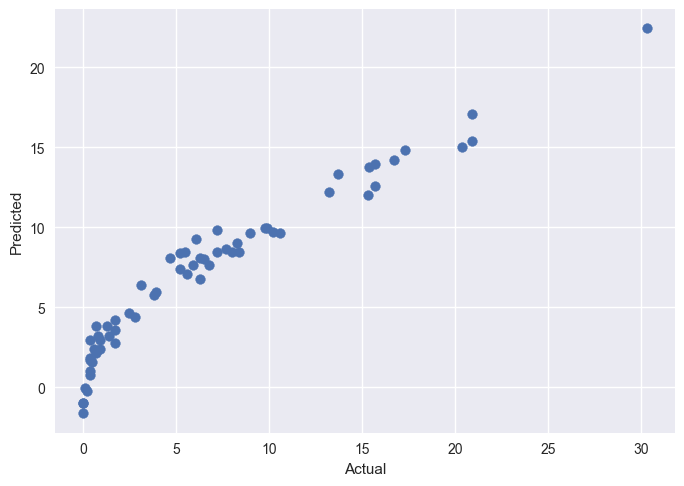

In [57]:
#Model Training
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr = ElasticNet()
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse , mae ,r2)
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

n_jobs is used to control parallelization, and the number of CPU cores to use during model fitting, cross-validation, or other operations.
n_jobs=-1 maximizes the use of available processors, speeding up computations.
n_jobs=1 runs computations sequentially on a single core.

0.7924995554743621 0.6199701158263431 0.9820946715928275


Text(0, 0.5, 'Predicted')

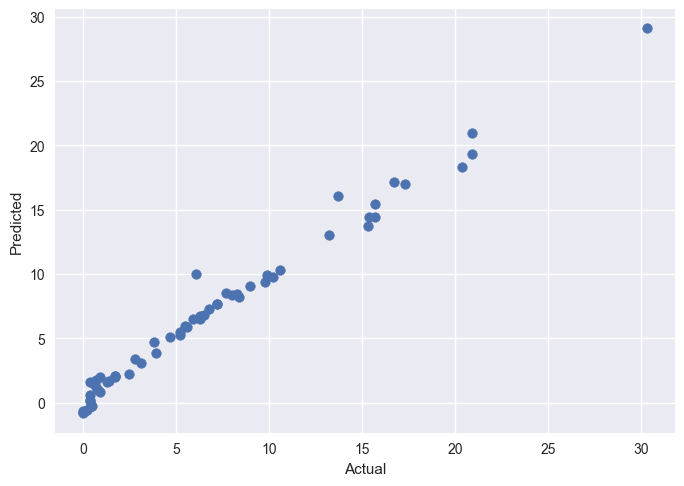

In [58]:
#HyperParameterTuning using CV
#Model Training
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr = LassoCV(cv = 5) #bydefault 5 folds
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse , mae ,r2)
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [59]:
lr.alpha_

0.05725391318234405

In [60]:
lr.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

0.6949198918151945 0.5642305340106358 0.9842993364555516


Text(0, 0.5, 'Predicted')

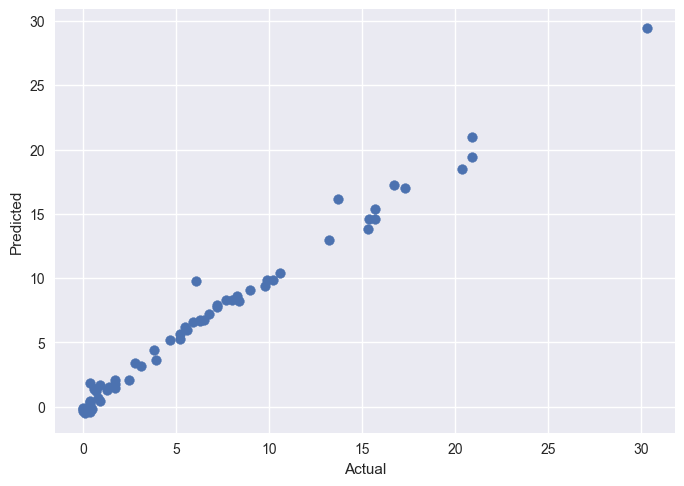

In [61]:
#HyperParameterTuning using CV
#Model Training
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr = RidgeCV() #bydefault 5 folds
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse , mae ,r2)
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [62]:
import pickle
pickle.dump(r,open('model.pkl','wb'))

model = pickle.load(open('model.pkl' , 'rb'))

In [63]:
import pickle
pickle.dump(sc,open('scakar.pkl','wb'))


In [64]:

scalar = pickle.load(open('scakar.pkl' , 'rb'))